In [80]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris, fetch_california_housing, fetch_openml
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, mean_absolute_error
import matplotlib.pyplot as plt
import plotly.graph_objects as go

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1Bb9KbfZ2Sq1yFLfTJS5nzABnYTWDgZS3?usp=sharing)

# Titanic

In [81]:
# Fetch Titanic dataset from OpenML
titanic = fetch_openml('titanic', version=1, as_frame=True)
titanic_data = titanic.frame

# Preprocess the Titanic dataset
titanic_data['age'].fillna(titanic_data['age'].median(), inplace=True)
titanic_data['fare'].fillna(titanic_data['fare'].median(), inplace=True)
titanic_data.dropna(subset=['embarked'], inplace=True)
titanic_data['sex'] = titanic_data['sex'].map({'male': 0, 'female': 1}).astype(int)
titanic_data['embarked'] = titanic_data['embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)

X_titanic = titanic_data[['pclass', 'sex', 'age', 'fare']]
y_titanic = titanic_data['survived'].astype(int)
X_titanic.head(5)

<ipython-input-81-240366c66e03>:6: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-81-240366c66e03>:7: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[

,pclass,sex,age,fare
0,1,1,29.0000,211.3375
1,1,0,0.9167,151.5500
2,1,1,2.0000,151.5500
3,1,0,30.0000,151.5500
4,1,1,25.0000,151.5500


In [82]:
# Splitting the dataset
X_train_titanic, X_test_titanic, y_train_titanic, y_test_titanic = train_test_split(X_titanic, y_titanic, test_size=0.2, random_state=42)

In [83]:
# No tuning
tree_titanic = DecisionTreeClassifier(criterion='gini', random_state=42)
tree_titanic.fit(X_train_titanic, y_train_titanic)

y_pred_titanic = tree_titanic.predict(X_test_titanic)
accuracy_titanic = accuracy_score(y_test_titanic, y_pred_titanic)
f1_score_titanic = f1_score(y_test_titanic, y_pred_titanic, average='macro')
print(f'Titanic Dataset - Accuracy: {accuracy_titanic}, F1 Score: {f1_score_titanic}')

Titanic Dataset - Accuracy: 0.7213740458015268, F1 Score: 0.7094858358016253


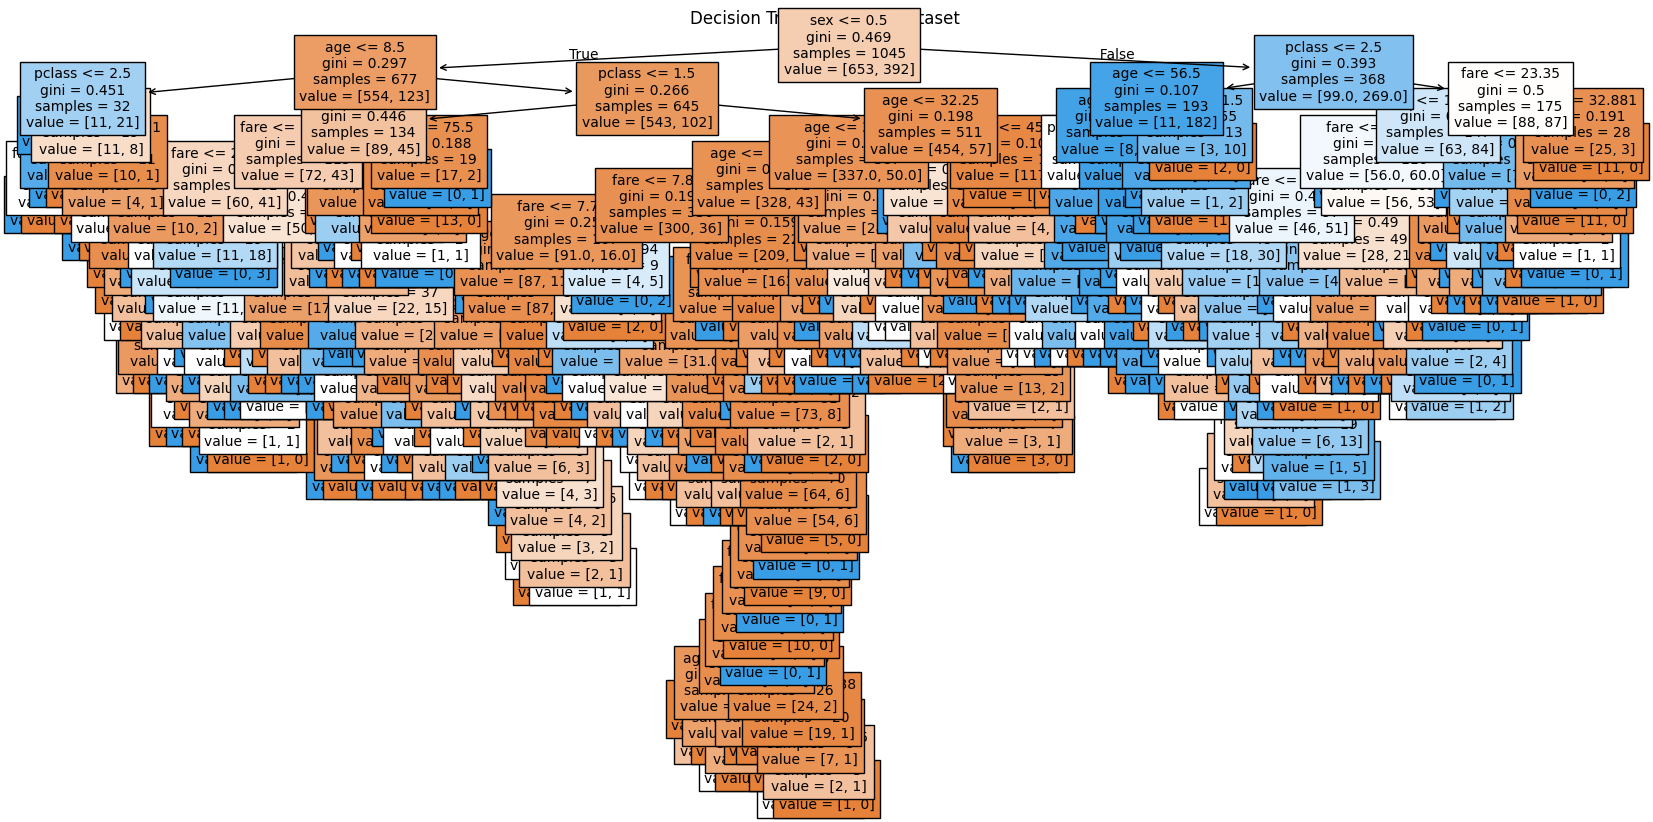

In [84]:
plt.figure(figsize=(20,10))
plot_tree(tree_titanic, filled=True, feature_names=X_titanic.columns, fontsize=10)
plt.title('Decision Tree for Titanic Dataset')
plt.show()

In [85]:
# Tuning max_depth
tree_titanic_v1 = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
tree_titanic_v1.fit(X_train_titanic, y_train_titanic)

y_pred_titanic_v1 = tree_titanic_v1.predict(X_test_titanic)
accuracy_titanic_v1 = accuracy_score(y_test_titanic, y_pred_titanic_v1)
f1_score_titanic_v1 = f1_score(y_test_titanic, y_pred_titanic_v1, average='macro')
print(f'Titanic Dataset with max_depth=3 - Accuracy: {accuracy_titanic_v1}, F1 Score: {f1_score_titanic_v1}')

Titanic Dataset with max_depth=3 - Accuracy: 0.7709923664122137, F1 Score: 0.7564603086075479


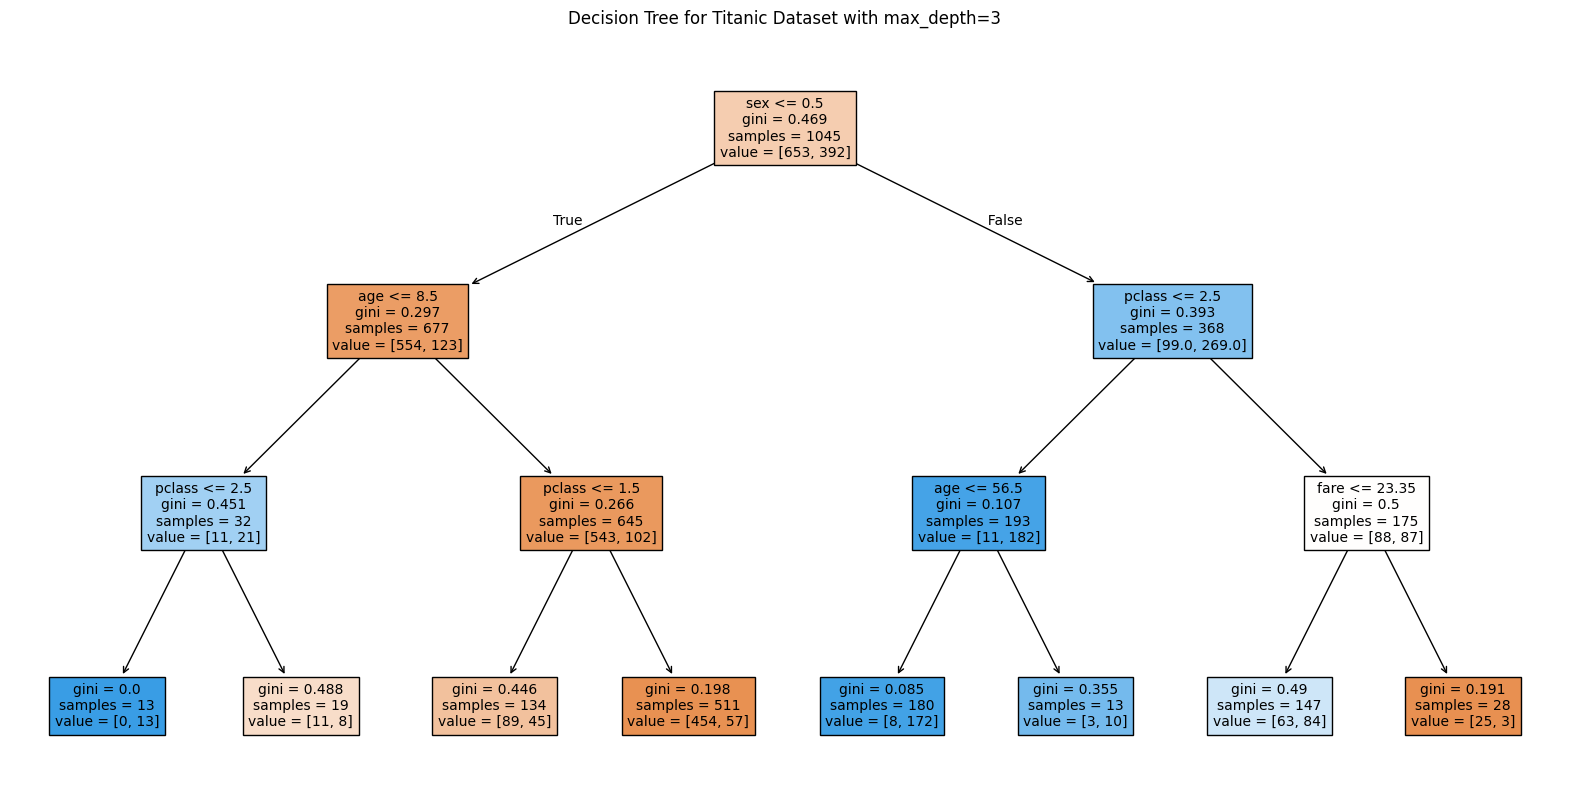

In [86]:
plt.figure(figsize=(20,10))
plot_tree(tree_titanic_v1, filled=True, feature_names=X_titanic.columns, fontsize=10)
plt.title('Decision Tree for Titanic Dataset with max_depth=3')
plt.show()

In [87]:
# Tuning min_samples_split
tree_titanic_v2 = DecisionTreeClassifier(criterion='entropy', min_samples_split=50, random_state=42)
tree_titanic_v2.fit(X_train_titanic, y_train_titanic)

y_pred_titanic_v2 = tree_titanic_v2.predict(X_test_titanic)
accuracy_titanic_v2 = accuracy_score(y_test_titanic, y_pred_titanic_v2)
f1_score_titanic_v2 = f1_score(y_test_titanic, y_pred_titanic_v2, average='macro')
print(f'Titanic Dataset with min_samples_split=50 - Accuracy: {accuracy_titanic_v2}, F1 Score: {f1_score_titanic_v2}')

Titanic Dataset with min_samples_split=50 - Accuracy: 0.7404580152671756, F1 Score: 0.7239883497552209


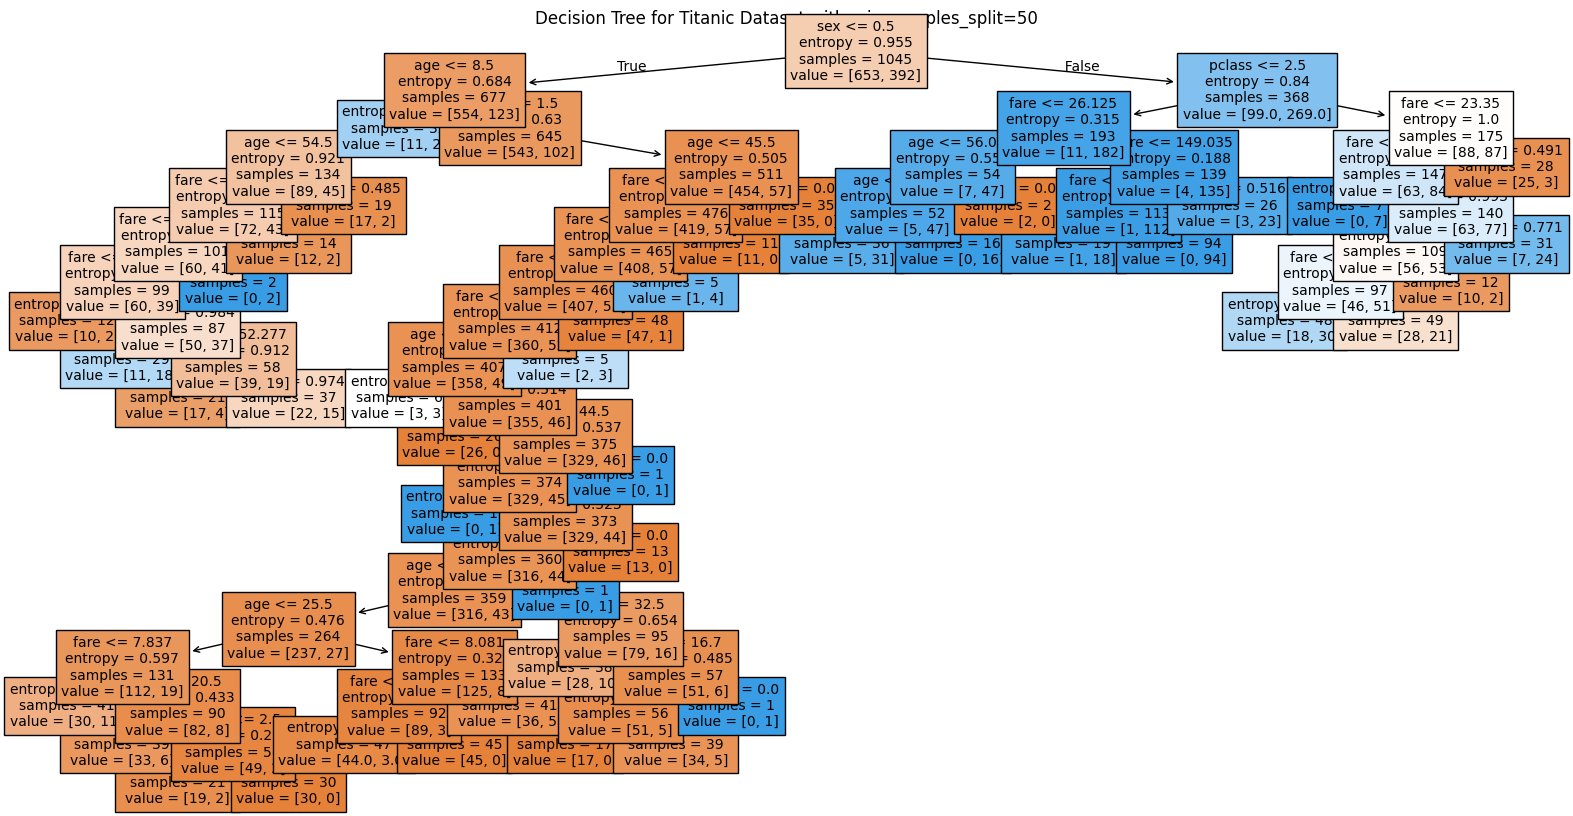

In [88]:
plt.figure(figsize=(20,10))
plot_tree(tree_titanic_v2, filled=True, feature_names=X_titanic.columns, fontsize=10)
plt.title('Decision Tree for Titanic Dataset with min_samples_split=50')
plt.show()

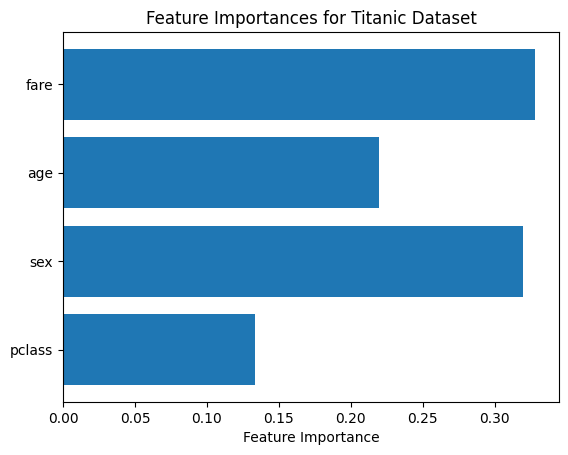

In [89]:
# Plotting feature importances
plt.figure()
plt.barh(X_titanic.columns, tree_titanic.feature_importances_)
plt.xlabel('Feature Importance')
plt.title('Feature Importances for Titanic Dataset')
plt.show()

# Iris

In [90]:
# Iris dataset (for regression; modifying target to continuous for demonstration)
iris = load_iris(as_frame=True)
X_iris = iris.data
y_iris = iris.target * 0.5  # Convert to a regression problem by scaling
X_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [91]:
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

In [92]:
tree_iris = DecisionTreeRegressor(criterion='friedman_mse', random_state=42)
tree_iris.fit(X_train_iris, y_train_iris)

DecisionTreeRegressor(criterion='friedman_mse', random_state=42)

In [93]:
y_pred_iris = tree_iris.predict(X_test_iris)
mae_iris = mean_absolute_error(y_test_iris, y_pred_iris)
print(f'Iris Dataset - MAE: {mae_iris}')

Iris Dataset - MAE: 0.0


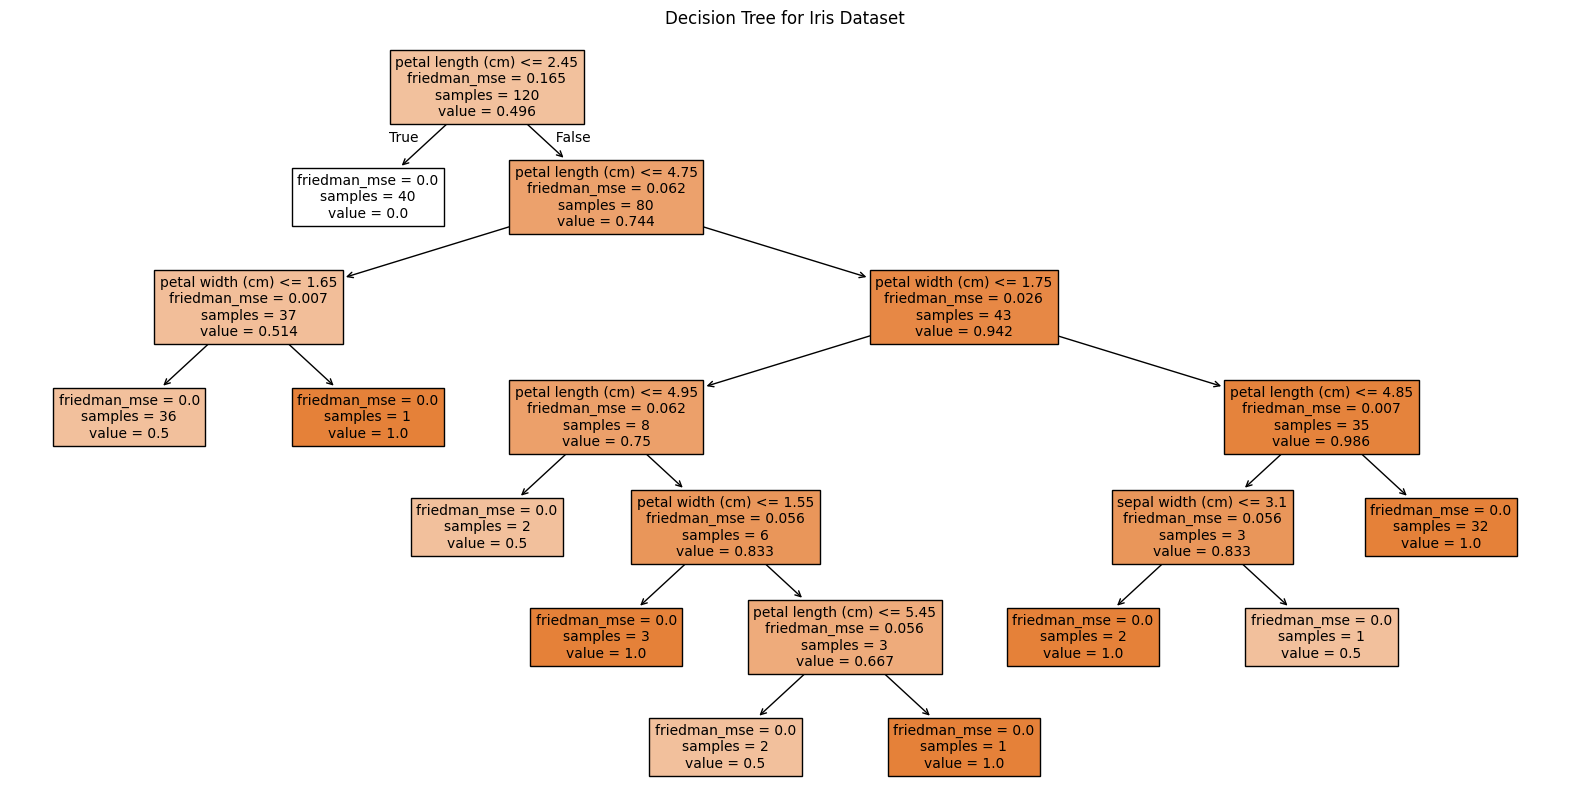

In [94]:
plt.figure(figsize=(20,10))
plot_tree(tree_iris, filled=True, feature_names=X_iris.columns, fontsize=10)
plt.title('Decision Tree for Iris Dataset')
plt.show()

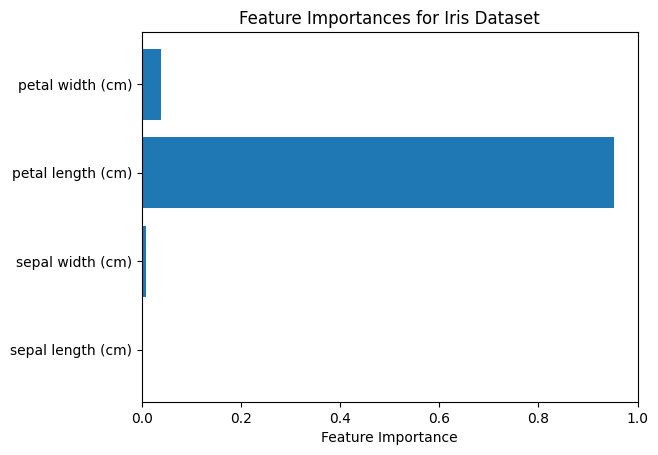

In [95]:
plt.figure()
plt.barh(X_iris.columns, tree_iris.feature_importances_)
plt.xlabel('Feature Importance')
plt.title('Feature Importances for Iris Dataset')
plt.show()

# Boston Housing

In [96]:
# Boston housing
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
X_boston =  pd.DataFrame(np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]]))
X_boston.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
X_boston = X_boston.drop(['CHAS', 'INDUS', 'RAD'], axis=1)
y_boston = raw_df.values[1::2, 2]
X_boston.head()

,CRIM,ZN,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98
1,0.02731,0.0,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14
2,0.02729,0.0,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03
3,0.03237,0.0,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94
4,0.06905,0.0,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33


In [97]:
X_train_boston, X_test_boston, y_train_boston, y_test_boston = train_test_split(X_boston, y_boston, test_size=0.2, random_state=42)

In [98]:
tree_boston = DecisionTreeRegressor(criterion='friedman_mse', random_state=42)
tree_boston.fit(X_train_boston, y_train_boston)

DecisionTreeRegressor(criterion='friedman_mse', random_state=42)

In [99]:
y_pred_boston = tree_boston.predict(X_test_boston)
mae_boston = mean_absolute_error(y_test_boston, y_pred_boston)
print(f'Boston Housing Dataset - MAE: {mae_boston}')

Boston Housing Dataset - MAE: 2.607843137254903


In [100]:
'''plt.figure(figsize=(20,10))
plot_tree(tree_boston, filled=True, feature_names=X_boston.columns, fontsize=10)
plt.title('Decision Tree for Boston Housing Dataset')
plt.show()'''

"plt.figure(figsize=(20,10))\nplot_tree(tree_boston, filled=True, feature_names=X_boston.columns, fontsize=10)\nplt.title('Decision Tree for Boston Housing Dataset')\nplt.show()"

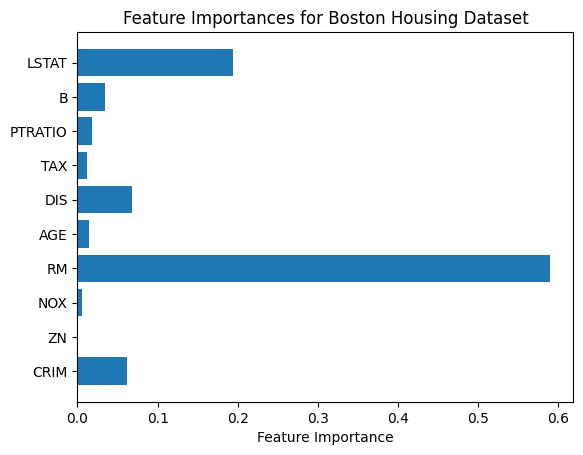

In [101]:
plt.figure()
plt.barh(X_boston.columns, tree_boston.feature_importances_)
plt.xlabel('Feature Importance')
plt.title('Feature Importances for Boston Housing Dataset')
plt.show()

# Feature importances

In [102]:
import plotly.express as px

def plot_feature_importances(columns, importances):
    # Create a DataFrame for easier handling
    df = pd.DataFrame({
        'Feature': columns,
        'Importance': importances
    })
    # Sort the DataFrame by importances in descending order
    df = df.sort_values(by='Importance', ascending=False)

    # Create the plot using Plotly Express
    fig = px.bar(df, x='Importance', y='Feature', orientation='h',
                 title='Feature Importances',
                 labels={'Feature': 'Feature', 'Importance': 'Importance'},
                 height=600, width=800)
    fig.update_layout(yaxis={'categoryorder': 'total ascending'})
    fig.show()

# Example usage with arbitrary data
features = ['feature1', 'feature2', 'feature3', 'feature4']
importances = [0.2, 0.1, 0.4, 0.3]
plot_feature_importances(features, importances)


In [103]:
plot_feature_importances(X_titanic.columns, tree_titanic.feature_importances_)

In [104]:
plot_feature_importances(X_iris.columns, tree_iris.feature_importances_)

In [105]:
plot_feature_importances(X_boston.columns, tree_boston.feature_importances_)

# First pass function

In [106]:
from sklearn.datasets import load_breast_cancer

In [107]:
def run_decision_tree_classification(df, target_column):
    # Prepare the data
    X = df.drop(columns=[target_column])
    y = df[target_column]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and train the decision tree classifier
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, y_train)

    # Make predictions and calculate accuracy
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')

    # Plotting the feature importances
    features = X.columns
    importances = clf.feature_importances_
    df_importances = pd.DataFrame({'Features': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

    fig = px.bar(df_importances, x='Importance', y='Features', orientation='h',
                 title='Feature Importances',
                 labels={'Features': 'Features', 'Importance': 'Importance'})
    fig.show()

    # Plot tree
    plt.figure(figsize=(20, 10))
    plot_tree(clf, filled=True, feature_names=features)
    plt.title('Decision Tree')
    plt.show()

In [108]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

Accuracy: 0.95


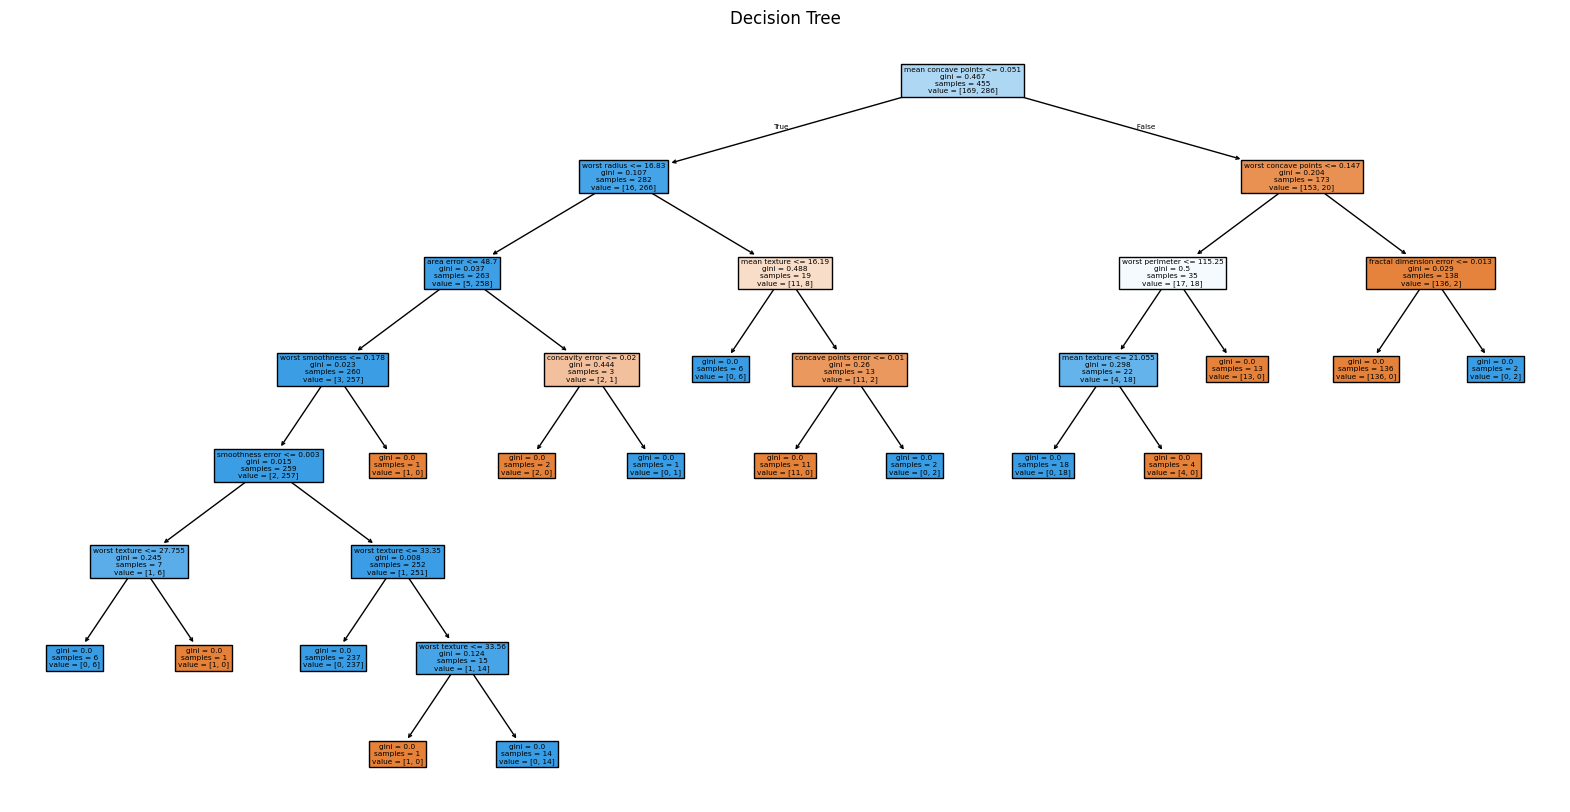

In [109]:
run_decision_tree_classification(df, 'target')